In [1]:
using Plots

In [4]:
function normalCDF(x::Float64, μ::Float64, σ::Float64)::Float64
    return 0.5 * (1.0 + erf((x - μ) / (σ * sqrt(2))))
end

function normalPDF(x::Float64, μ::Float64, σ::Float64)::Float64
    return (1 / (σ * sqrt(2 * pi))) * exp(-0.5 * ((x - μ) / σ)^2)
end

#https://community.wvu.edu/~mcvalenti/documents/HNS2007.pdf
function conditional_h(x::Float64, y::Float64, σ::Float64)::Float64
    return -log2(normalPDF(y, x, σ)) + log2(normalPDF(y, -1.0, σ) + normalPDF(y, 1.0, σ))
end

function BPSK_Constrained_Capacity(σ::Float64)::Float64
    trials = 1e7
    sum = 0
    for _ in 1:trials
        x = rand([-1.0, 1.0])
        y = x + randn() * σ

        sum = sum + conditional_h(x, y, σ)
    end
    return 1.0 - sum / trials
end

SNRs = -3:0.5:13
bpsk_capacity = [BPSK_Constrained_Capacity(10^(-snr / 20)) for snr in SNRs];
unconstrained_capacity = [0.5 * log2(1 + 10^(snr / 10)) for snr in SNRs];

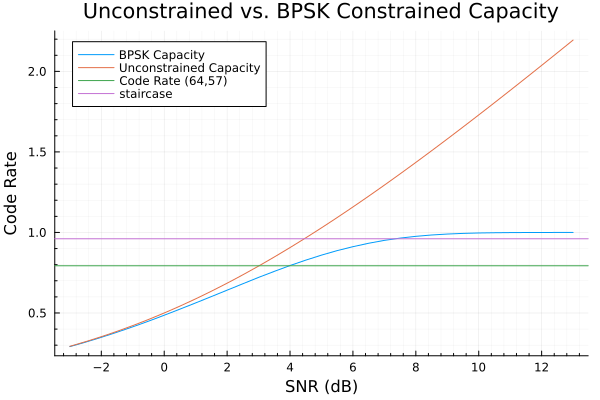

In [5]:
plot(SNRs, bpsk_capacity, label="BPSK Capacity", title="Unconstrained vs. BPSK Constrained Capacity", xlabel="SNR (dB)", ylabel="Code Rate", minorgrid=true)
plot!(SNRs, unconstrained_capacity, label="Unconstrained Capacity")
hline!([(57 / 64)^2], label="Code Rate (64,57)")
hline!([(246 / 256)], label="staircase")
# vline!([4])
# plot!(xlims=[3.8,4.], ylims=[0.77,0.8])